In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 로이터 기사 데이터 셋을 로딩합니다.
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [8]:
train_data.shape
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[0]

3

In [9]:
# 데이터의 준비
def vectorize_sequences(sequences, dimension = 10000):

    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

# 데이터의 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [12]:
# 라벨 데이터의 엔코딩
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i ,sequence in enumerate(labels):
        results[i, sequence] = 1

    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
# categorical 데이터로 변환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [32]:
# 신경망을 구성합니다.

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [33]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# 훈련데이터의 준비

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [35]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 50ms/step - loss: 2.5320 - accuracy: 0.5489 - val_loss: 1.6693 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.3735 - accuracy: 0.7080 - val_loss: 1.2679 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 1.0126 - accuracy: 0.7789 - val_loss: 1.1032 - val_accuracy: 0.7700
Epoch 4/20
16/16 [==============================] - 0s 30ms/step - loss: 0.7880 - accuracy: 0.8332 - val_loss: 1.0143 - val_accuracy: 0.7970
Epoch 5/20
16/16 [==============================] - 0s 31ms/step - loss: 0.6258 - accuracy: 0.8730 - val_loss: 0.9446 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.4996 - accuracy: 0.8985 - val_loss: 0.9180 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 0.3983 - accuracy: 0.9183 - val_loss: 0.8786 - val_accuracy: 0.8130
Epoch 8/20
16

In [36]:
# 학습 결과를 가져온다.
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

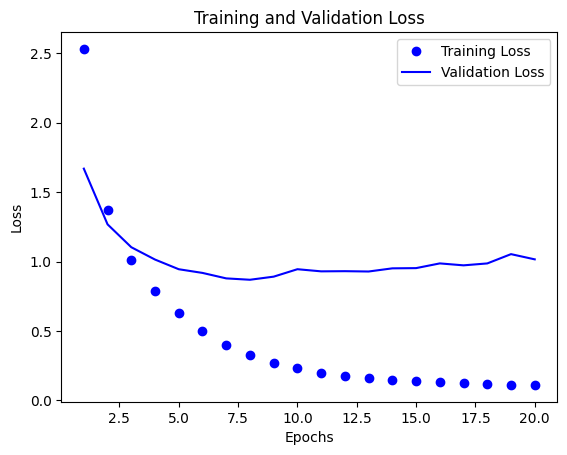

In [37]:
# 결과를 시각화 한다,
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

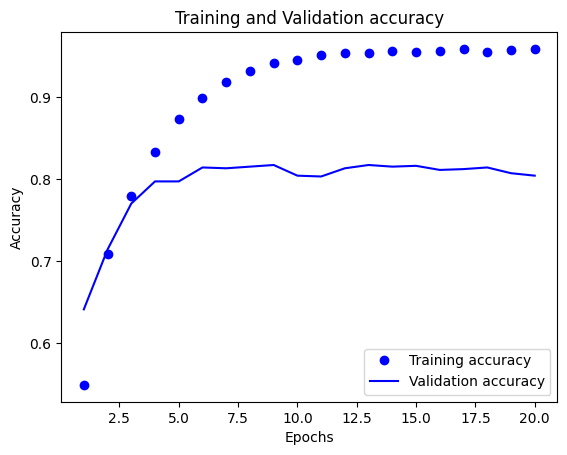

In [38]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()